<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/descarga_datos_netcdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga de datos en formato NetCDF con *cdsapi*
---

### Repositorios de datos Copernicus/ECMWF

Copernicus/ECMWF mantiene dos servicios que permiten el acceso gratuito a repositorios de datos. Para hacer uso de ellos es preciso registrarse en los respectivos portales: 

*   [Climate Data Store (CDS)](https://cds.climate.copernicus.eu/#!/home): datos del Climate Change Service
*   [Atmosphere Data Store (ADS)](https://ads.atmosphere.copernicus.eu/#!/home): datos del Atmosphere Monitoring Service

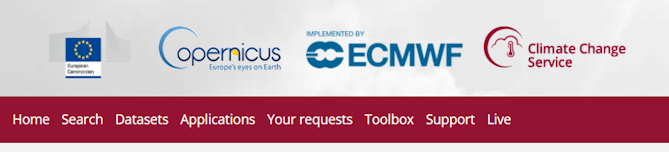

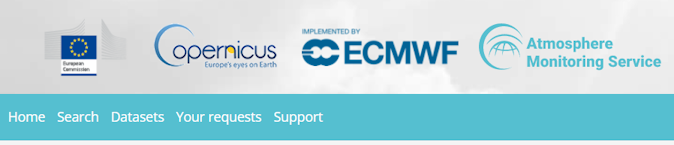

### Climate Data Store Application Program Interface (cdsapi)

***cdsapi*** es una extensión Python que permite la descarga de datos de los servicios mencionados. Para usarla necesitamos las credenciales de acceso que podemos consultar en:

* https://cds.climate.copernicus.eu/api-how-to
* https://ads.atmosphere.copernicus.eu/api-how-to

Si solo vamos a usar uno de los servicios, lo más cómodo es copiar las dos líneas que constituyen las credenciales en un fichero:

* $HOME/.cdsapirc (Linux)
* %USERPROFILE%\.cdsapirc (Windows)
* Consultar la documentación para otros sistemas operativos
* Limitar accesos a terceros

cdsapi accederá por defecto a ese fichero al realizar la autenticación. Sin embargo, si vamos a trabajar con ambos servicios tendremos que escribir las credenciales en ficheros distintos (de nombre arbitrario) a los que se accederá en cada caso.



### Instalación de cdsapi

In [ ]:
# Instalamos mediante pip
# La opción -q elimina la información durante la instalación
# También está disponible en repositorios conda
# ----------------------------------------------
! pip -q install cdsapi

### Descarga de datos ERA5



Los reanálisis ERA5 se encuentran en el repositorio CDS.

Si solo fuéramos a usar ese repositorio nuestras credenciales estarán en $HOME/.cdsapirc y para inicializar el cliente bastaría con hacer:

In [ ]:
"""
# Importa extensiones
# -------------------
import cdsapi

# Inicializa el cliente cdsapi tomando las credenciales
# del fichero .cdsapirc que se encuentra en $HOME
# ----------------------------------------------------- 
c = cdsapi.Client()
"""

Si trabajamos tanto con CDS como con ADS, las credenciales estarán en ficheros distintos (por ejemplo, en las rutas relativas *cds/key.txt* y *ads/key.txt*) y la inicialización puede hacerse mediante:

In [ ]:
"""
# Importa extensiones
import cdsapi
import yaml

# Acceso a CDS usando las credenciales que se encuentran
# en el fichero ./cds/key.txt
# --------------------------------------------------------
with open('cds/key.txt', 'r') as f:
        credentials = yaml.safe_load(f)
c = cdsapi.Client(url=credentials['url'], key=credentials['key'])

# Acceso a ADS usando las credenciales que se encuentran
# en el fichero ./cds/key.txt
# --------------------------------------------------------
with open('ads/key.txt', 'r') as f:
        credentials = yaml.safe_load(f)
c = cdsapi.Client(url=credentials['url'], key=credentials['key'])
"""

Alternativamente existe la posibilidad de autenticarse indicando las credenciales mediante variables. Es la opción que usaremos en este Notebook.

In [ ]:
# Copiar los valores del fichero de credenciales tal y como
# aparecen en https://cds.climate.copernicus.eu/api-how-to
# --------------------------------------------------------
url = ''
key = ''

In [ ]:
# Importa extensiones
# -------------------
import cdsapi

# Inicializa el cliente
# ----------------------
c = cdsapi.Client(url=url, key=key)

A continuación especificamos los datos que se requieren y ejecutamos la consulta. 

La mejor forma de codificar una consulta libre de errores sintácticos pasa por simularla en la [aplicación web](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form). 

Tras indicar los campos, los tiempos y la cobertura geográfica el botón 'Show API request' mostrará el código necesario para la petición en Python:



In [ ]:
# Petición de datos ERA5
# Reanálisis de viento a 10 m, 
# precipitación acumulada en 1 hora y
# temperatura del aire a 2 m.
# área norte 50º / oeste -20º / sur 20º / este 10º
# fecha: 1 de junio de 2023
# horas: 00, 06 y 12 UTC
# El resultado se guarda en un fichero NetCDF 'era5.nc'
# Nota: la resolución espacial es por defecto 0.25º
# ----------------------------------------------------
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '10m_u_component_of_wind', 
            '10m_v_component_of_wind', 
            '2m_temperature',
            'total_precipitation'
        ],
        'year': '2023',
        'month': '01',
        'day': '06',
        'time': ['00:00','06:00','12:00'],
        'format': 'netcdf',
        'area' : [50, -20, 20, 10],
    },
    'era5.nc')

### Descarga de datos CAMS

De forma análoga al caso anterior indicamos las credenciales para acceder al ADS

In [ ]:
# Copiar los valores del fichero de credenciales tal y como
# aparecen en https://ads.atmosphere.copernicus.eu/api-how-to
# --------------------------------------------------------
url = ''
key = ''

Inicializamos el cliente con las nuevas credenciales

In [ ]:
# Inicializa el cliente
# ----------------------
c = cdsapi.Client(url=url, key=key)

Abrimos la [aplicación web](https://ads.atmosphere.copernicus.eu/cdsapp#!/search?type=dataset) para guiarnos en la elaboración de la consulta.

Y ejecutamos:

In [ ]:
# Petición de datos CAMS
# Predicciones de concentración de material 
# particulado de diámetro inferior a 10um 
# área norte 50º / oeste -20º / sur 20º / este 10º
# fecha de pasada del modelo: 6 de enero de 2023
# hora de pasada del modelo: 12 UTC
# Alcances de predicción: H+0, H+24 y H+48
# El resultado se guarda en un fichero NetCDF 'cams.nc'
# Nota: la resolución espacial es por defecto 0.25º
# ----------
c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'date': '2023-01-06',
        'type': 'forecast',
        'format': 'netcdf',
        'variable': 'particulate_matter_10um',
        'time': '12:00',
        'leadtime_hour': [0,24,48],
        'area' : [50, -20, 20, 10],
    },
    'cams.nc')

### Repositorio de datos del ECMWF

Para acceder a los datos de modelización del ECMWF el procedimiento es muy similar a los que hemos visto anteriormente.

Empezamos por registrarnos en https://www.ecmwf.int/user/login

Y a continuación instalamos el cliente web

In [ ]:
pip -q install ecmwf-api-client

Nuestras credenciales de acceso pueden consultarse en: 

* https://api.ecmwf.int/v1/key/

Lo habitual es copiarlas en un fichero de texto .ecmwfapirc:

* $HOME/.ecmwfapirc (Linux)
* %USERPROFILE%\.ecmwfapirc (Windows)
* Consultar la [documentación](https://pypi.org/project/ecmwf-api-client/) para otros sistemas operativos
* Limitar accesos a terceros

Alternativamente podemos copiarlas a un fichero arbitrario e indicar su localización (relativa o absoluta) mediante la variable de entorno ECMWF_API_RC_FILE. Por ejemplo, si el fichero de credenciales keys.txt se encuentra en el directorio local ecmwf haríamos:

*  export ECMWF_API_RC_FILE=ecmwf/keys.txt

El cliente se inicializa así:

In [ ]:
"""
# Importamos la extensión
# ------------------------
from ecmwfapi import ECMWFService

# Inicializamos el ciente
# ------------------------
server = ECMWFService("mars")
"""

Alternativamente podemos hacer uso de la variable de entorno definiéndola en el mismo script de Python. Esto es especialmente cómodo cuando se trabaja en entorno Windows.

In [ ]:
"""
# Importamos la extensión
# ------------------------
from ecmwfapi import ECMWFService

# Importamos la extensión os
# ---------------------------
import os

# Declaramos la variable de entorno que apunta al
# fichero de credenciales
# ------------------------------------------------
os.environ['ECMWF_API_RC_FILE'] = 'ecmwf/keys.txt'

# Inicializamos el ciente
# ------------------------
server = ECMWFService("mars")
"""

### Descarga de datos MARS

En el contexto de este Notebook crearemos un fichero de credenciales y usaremos la variable de entorno para indicar dónde se encuentra.

In [ ]:
# Copiamos aquí el diccionario que aparece en https://api.ecmwf.int/v1/key/
# --------------------------------------------------------------------------
keys = {
    "url"   : "",
    "key"   : "",
    "email" : ""
}

Y lo escribimos en un fichero local llamado 'keys.txt'

In [ ]:
import json
with open('keys.txt', 'w') as convert_file:
     convert_file.write(json.dumps(keys))

Inicializamos el cliente

In [ ]:
# Importar extensión ecmwfapi
# ----------------------------
from ecmwfapi import ECMWFService

# Importar extensión os
# ----------------------
import os

# Indicamos dónde está el fichero de credenciales
# ------------------------------------------------
os.environ['ECMWF_API_RC_FILE'] = '/content/keys.txt'

# Inicializamos el cliente para acceder al MARS
# ---------------------------------------------
server = ECMWFService("mars")

Desafortunadamente, en este caso no contamos con una aplicación web que nos genere automáticamente el código Python de la consulta. Sin embargo disponemos de [abundante documentación](https://confluence.ecmwf.int/display/WEBAPI/ECMWF+Web+API+Home) con ejemplos.

In [ ]:
# Petición de datos ecmwf/MARS
# Predicciones de viento a 10 metros y temperatura a 2 metros 
# área norte 50º / oeste -20º / sur 20º / este 10º
# fecha de pasada del modelo: 7 de junio de 2023
# hora de pasada del modelo: 12 UTC
# Alcances de predicción: H+00, H+06 y H+12
# El resultado se guarda en un fichero NetCDF 'oper.nc'
# ----------
server.execute(
    {       
        "class"    : "od",
        "date"     : "20230607",
        "expver"   : "1",
        "levtype"  : "sfc",
        "param"    : "10u/10v/2t",
        "step"     : "00/06/12",
        "stream"   : "oper",
        "time"     : "12:00",   
        "type"     : "fc",
        "area"     : "50/-20/20/10",       
        "grid"     : '0.25/0.25',       
        "format"   : "netcdf"
    },
    'oper.nc' )